In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
data = pd.read_csv('Cleaned_data.csv')

In [102]:
data.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [103]:
data.drop(['Unnamed: 0','day','month','year'],axis=1,inplace=True)

In [104]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [125]:
data.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [105]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [106]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [107]:
#dependent and independent

In [126]:
X=data.drop(['FWI'],axis=1)

In [127]:
y=data['FWI']

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: >

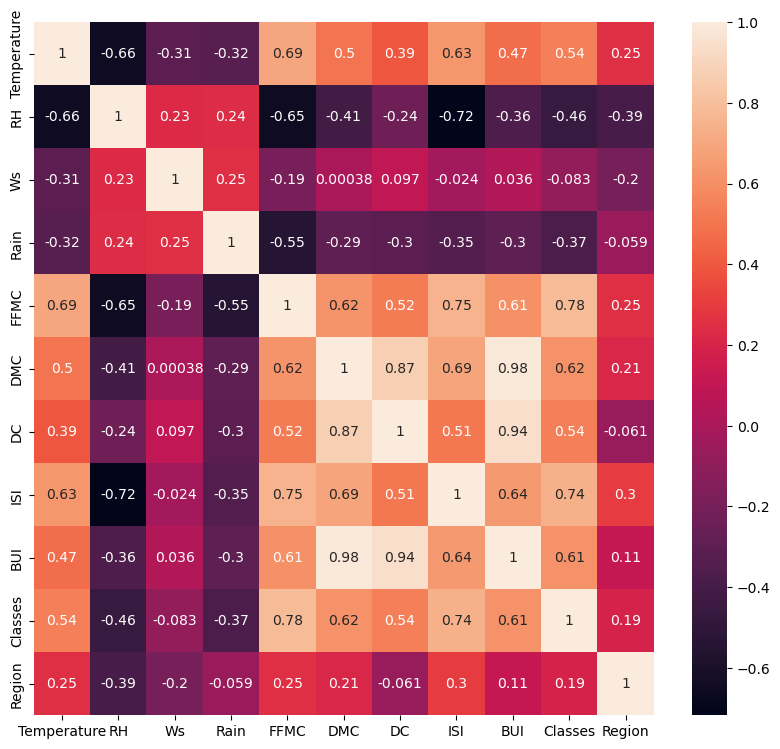

In [130]:
plt.figure(figsize=(10,9))
sns.heatmap(X_train.corr(),annot=True)

In [131]:
# extracting required features --domain expertise --threshold:0.85

In [132]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [133]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [134]:
X_train.drop(['BUI','DC'],axis=1,inplace=True)

In [135]:
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler=StandardScaler()

In [138]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) # keeping mean and s.d. of training here

Text(0.5, 1.0, 'X_train After Scaling')

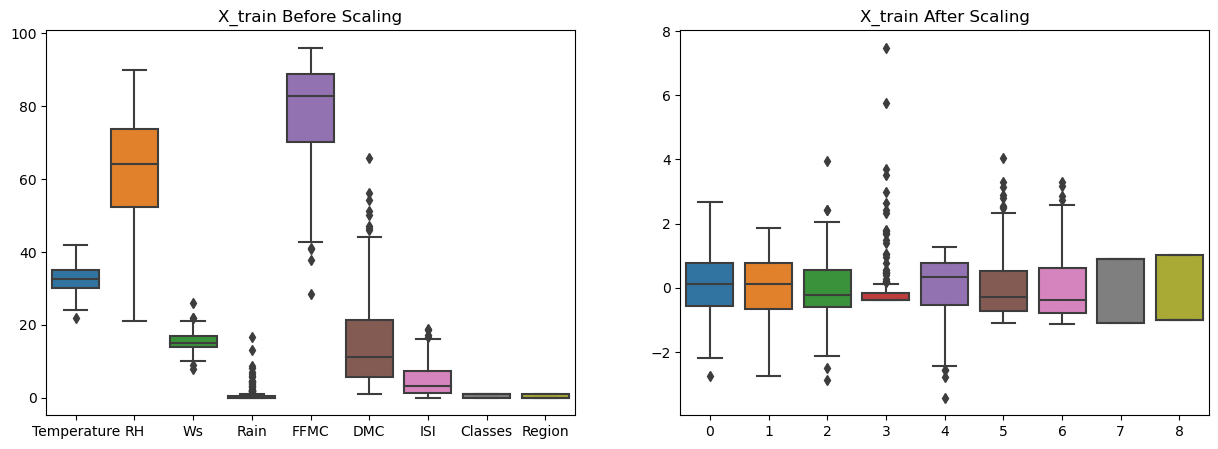

In [139]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Text(0.5, 1.0, 'X_test After Scaling')

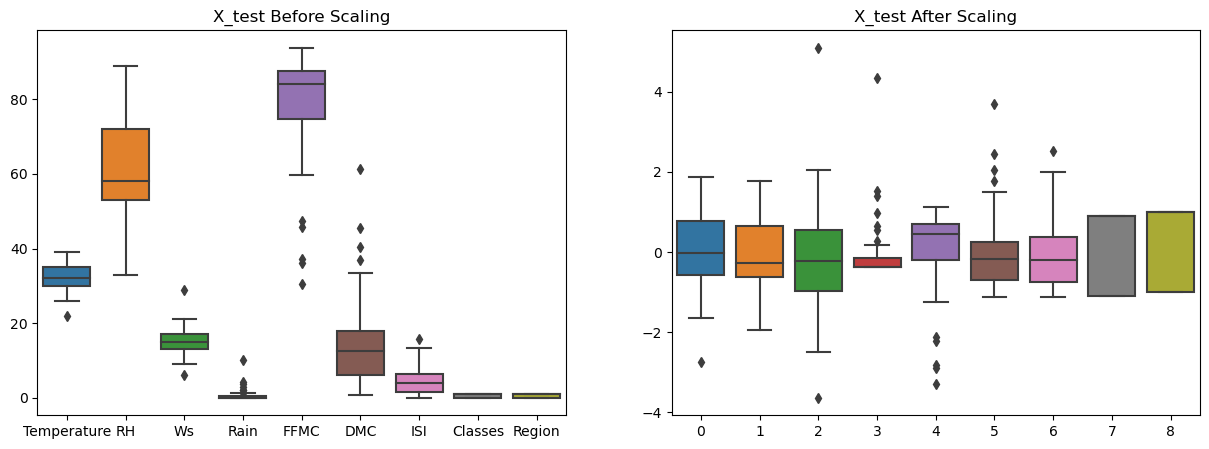

In [140]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_test)
plt.title('X_test Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test_scaled)
plt.title('X_test After Scaling')

## Linear Regression , Lasso, Ridge, ElasticNet

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , RidgeCV
from sklearn.linear_model import Lasso , ElasticNet , LassoCV , ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [218]:
def models(model):
    g_model = model
    g_model.fit(X_train_scaled,y_train)
    y_pred=g_model.predict(X_test_scaled)
    mae=mean_absolute_error(y_test,y_pred)
    score=r2_score(y_test,y_pred)
    print("Mean absolute error", mae)
    print("Root mean square error",np.sqrt(mae))
    print("R2 Score", score)
    plt.scatter(y_test,y_pred)

Mean absolute error 0.546823646524999
Root mean square error 0.7394752507859874
R2 Score 0.9847657384266951


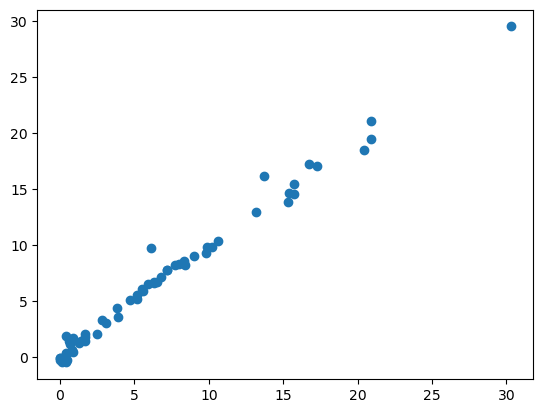

In [219]:
models(LinearRegression())

Mean absolute error 0.5642305340105711
Root mean square error 0.7511528033699741
R2 Score 0.9842993364555512


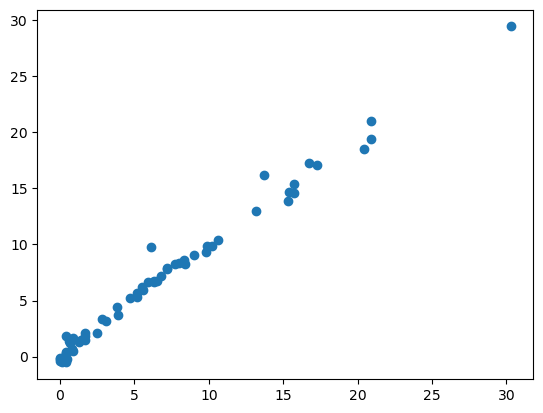

In [220]:
models(Ridge())

Mean absolute error 1.1331759949144082
Root mean square error 1.0645073954249489
R2 Score 0.9492020263112388


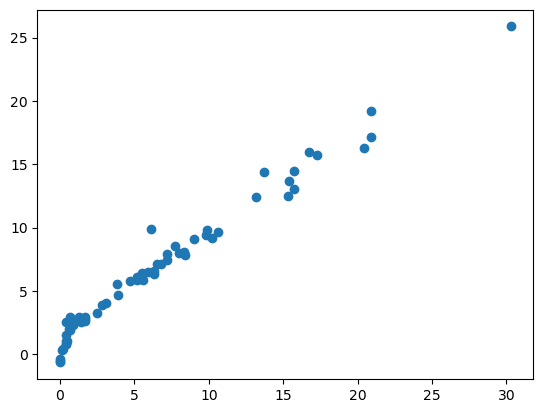

In [221]:
models(Lasso())

Mean absolute error 1.8822353634896
Root mean square error 1.3719458311061703
R2 Score 0.8753460589519703


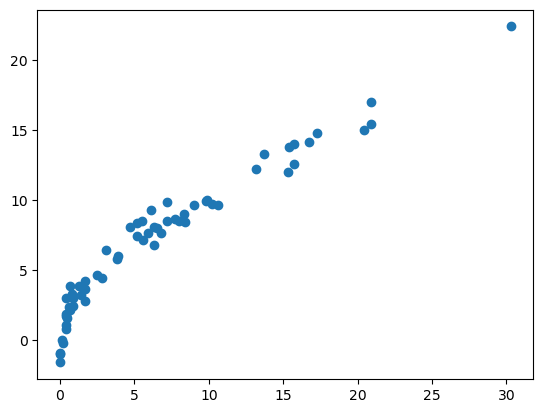

In [222]:
models(ElasticNet())

## Hyperparamter tunnings

In [244]:
def hy_models(model):

    g_modelcv = RidgeCV(cv=5)
    g_modelcv.fit(X_train_scaled, y_train)


    y_predcv = g_modelcv.predict(X_test_scaled)

    print("MAE:", mean_absolute_error(y_test, y_predcv))
    print("MSE:", mean_squared_error(y_test, y_predcv))
    print("R2:", r2_score(y_test, y_predcv))
    print("Intercept:", g_modelcv.intercept_)
    print("Alpha:", g_modelcv.alpha_)
    print("Params used:", g_modelcv.get_params())
    print("Alphas:", g_modelcv.alphas)

In [245]:
hy_models(RidgeCV())

MAE: 0.5642305340105711
MSE: 0.6949198918152096
R2: 0.9842993364555512
Intercept: 7.156043956043957
Alpha: 1.0
Params used: {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_values': False}
Alphas: (0.1, 1.0, 10.0)


In [246]:
hy_models(LassoCV())

MAE: 0.5642305340105711
MSE: 0.6949198918152096
R2: 0.9842993364555512
Intercept: 7.156043956043957
Alpha: 1.0
Params used: {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_values': False}
Alphas: (0.1, 1.0, 10.0)


In [247]:
hy_models(ElasticNetCV())

MAE: 0.5642305340105711
MSE: 0.6949198918152096
R2: 0.9842993364555512
Intercept: 7.156043956043957
Alpha: 1.0
Params used: {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_values': False}
Alphas: (0.1, 1.0, 10.0)
